In [4]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dharmayadagani","key":"bdd915208c0df764f0744ac711dcebfa"}'}

In [5]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d viditgandhi/tree-species-identification-dataset

Dataset URL: https://www.kaggle.com/datasets/viditgandhi/tree-species-identification-dataset
License(s): apache-2.0
 69% 50.0M/72.8M [00:00<00:00, 496MB/s]
100% 72.8M/72.8M [00:00<00:00, 553MB/s]


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!cp tree-species-identification-dataset.zip /content/drive/MyDrive/

In [9]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB0


In [10]:
import os
class_names = os.listdir(data_path)
class_names = [folder for folder in class_names if os.path.isdir(os.path.join(data_path, folder))]

print("Available Tree Species (Classes):")
print(class_names)


Available Tree Species (Classes):
['.git', 'amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


In [11]:
for class_name in class_names:
  folder_path=os.path.join(data_path,class_name)
  size=len(os.listdir(folder_path))
  print(f"Class: {class_name}\t\tSize: {size}")


Class: .git		Size: 5
Class: amla		Size: 50
Class: asopalav		Size: 50
Class: babul		Size: 50
Class: bamboo		Size: 50
Class: banyan		Size: 50
Class: bili		Size: 50
Class: cactus		Size: 50
Class: champa		Size: 50
Class: coconut		Size: 50
Class: garmalo		Size: 50
Class: gulmohor		Size: 50
Class: gunda		Size: 50
Class: jamun		Size: 50
Class: kanchan		Size: 50
Class: kesudo		Size: 50
Class: khajur		Size: 50
Class: mango		Size: 50
Class: motichanoti		Size: 50
Class: neem		Size: 50
Class: nilgiri		Size: 50
Class: other		Size: 150
Class: pilikaren		Size: 50
Class: pipal		Size: 50
Class: saptaparni		Size: 50
Class: shirish		Size: 50
Class: simlo		Size: 50
Class: sitafal		Size: 50
Class: sonmahor		Size: 50
Class: sugarcane		Size: 50
Class: vad		Size: 50


In [12]:

data_path = "/content/drive/MyDrive/Tree_Species_Dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

NUM_CLASSES = len(train_generator.class_indices)


Found 1280 images belonging to 31 classes.
Found 320 images belonging to 31 classes.


In [13]:
def plot_history(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Acc')
    plt.plot(epochs_range, val_acc, label='Val Acc')
    plt.title(f'{model_name} Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [14]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)



In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    restore_best_weights=True
)


In [17]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 372s 9s/step - accuracy: 0.0621 - loss: 3.4423 - val_accuracy: 0.1187 - val_loss: 3.3977
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.1097 - loss: 3.3045 - val_accuracy: 0.1344 - val_loss: 3.1771
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.1148 - loss: 3.1681 - val_accuracy: 0.1437 - val_loss: 2.9760
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.1436 - loss: 3.0244 - val_accuracy: 0.1688 - val_loss: 2.9787


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 952ms/step - accuracy: 0.1720 - loss: 2.9205
Validation Loss: 2.9673
Validation Accuracy: 0.1531


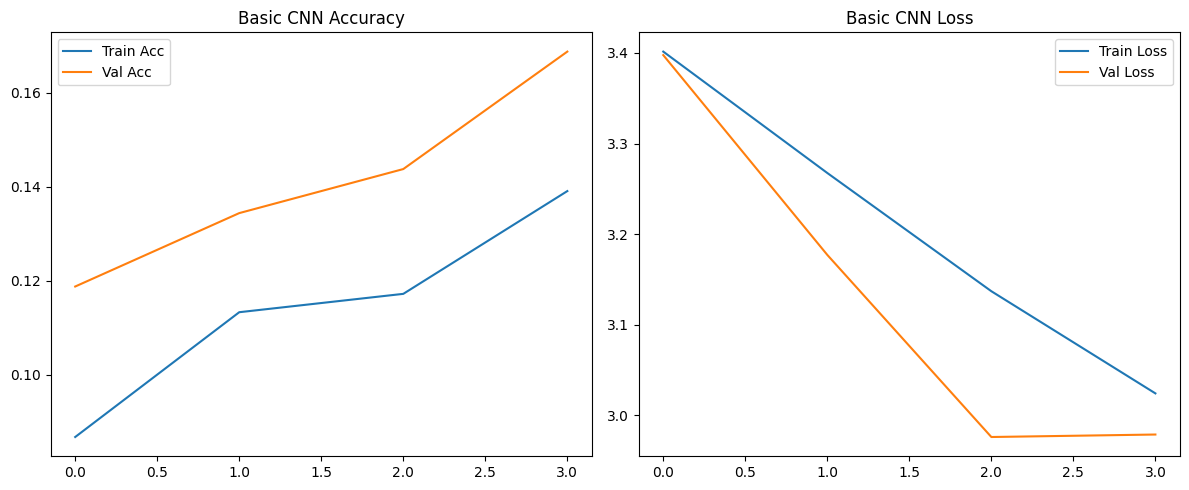

In [18]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Plot training history
plot_history(history, "Basic CNN")

In [19]:
model.save("basic_cnn.h5")

In [20]:
from google.colab import files
files.download('basic_cnn.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.0522 - loss: 11.4036 - val_accuracy: 0.0250 - val_loss: 3.9913
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.0854 - loss: 3.4922 - val_accuracy: 0.0500 - val_loss: 19.2609
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.0961 - loss: 3.4560 - val_accuracy: 0.0344 - val_loss: 38.6223
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.0792 - loss: 3.4578 - val_accuracy: 0.0406 - val_loss: 43.3892
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.1002 - loss: 3.4429 - val_accuracy: 0.0344 - val_loss: 52.8096
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.0894 - loss: 3.4150 - val_accuracy: 0.0500 - val_loss: 61.9698
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 104s 3s/step - accuracy: 0.1090 - loss: 3.4519 - val_accuracy: 0.1156 - val_loss: 41.6949
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.0906 - loss: 3.4229 - val_accuracy: 0.1

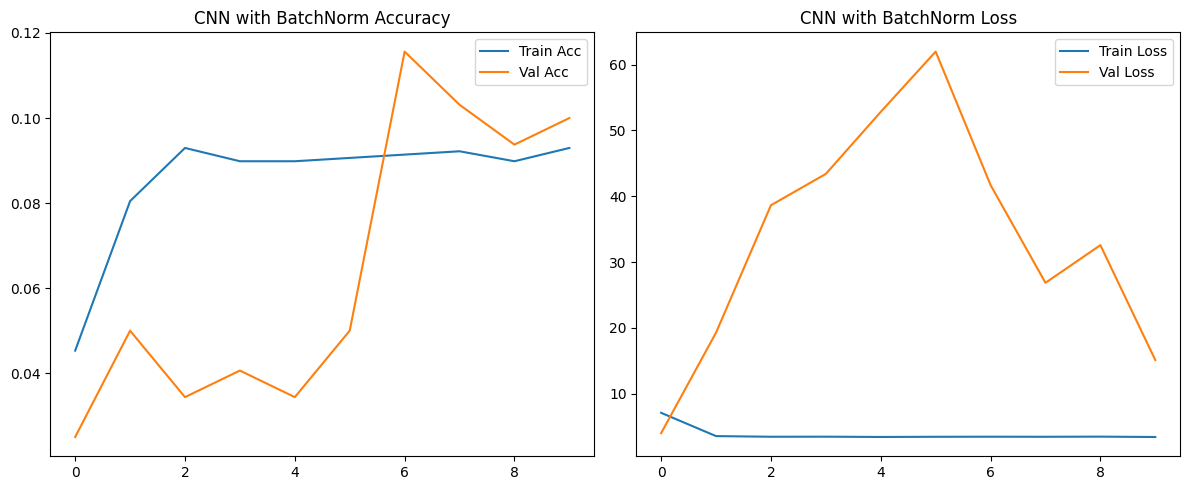

In [24]:
model_bn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

model_bn.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_bn = model_bn.fit(train_generator, validation_data=val_generator, epochs=10)
plot_history(history_bn, "CNN with BatchNorm")
model_bn.save("cnn_batchnorm_model.h5")

In [26]:
from google.colab import files
files.download('cnn_batchnorm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_530']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


40/40 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.0610 - loss: 3.4613 - val_accuracy: 0.0938 - val_loss: 3.4011
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.0897 - loss: 3.4116 - val_accuracy: 0.0938 - val_loss: 3.3846
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.0844 - loss: 3.4219 - val_accuracy: 0.0938 - val_loss: 3.3813
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.1153 - loss: 3.3723 - val_accuracy: 0.0938 - val_loss: 3.3925
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.0909 - loss: 3.3933 - val_accuracy: 0.0938 - val_loss: 3.3810
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.0999 - loss: 3.3885 - val_accuracy: 0.0938 - val_loss: 3.3805
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0849 - loss: 3.3953 - val_accuracy: 0.0938 - val_loss: 3.3766
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.0963 - loss: 3.3850 - val_accuracy: 0.0938 - val_loss: 3.3745
Epo

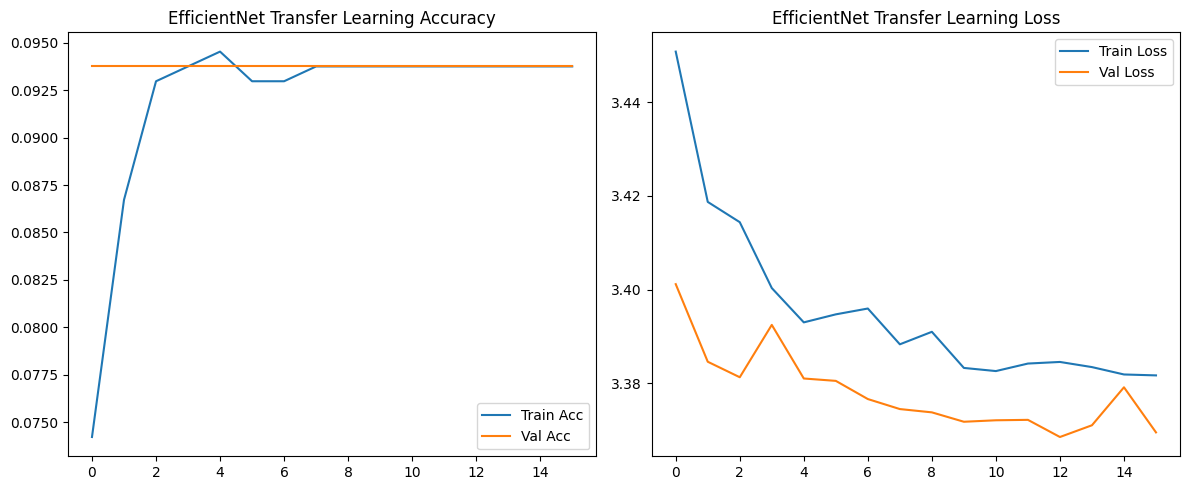

In [28]:

from tensorflow.keras.callbacks import EarlyStopping

base_model = EfficientNetB0(include_top=False, input_tensor=Input(shape=(150, 150, 3)), weights='imagenet')
base_model.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)


model_eff = Model(inputs=base_model.input, outputs=predictions)

model_eff.compile(
    optimizer=Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_eff = model_eff.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop]
)


plot_history(history_eff, "EfficientNet Transfer Learning")


model_eff.save("efficientnet_model.h5")


In [29]:
from google.colab import files
files.download('efficientnet_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>